# Pandas 

El presente tutorial tiene la intención de explicar, mediante ejemplos prácticos, las funciones básicas de la librería de python Pandas. Esta librería es una herramienta de código abierto creada para la manipulación y analisis de estructuras de datos.

Como primer paso, se debe tener instalada la libreria y sus dependencias. Para esto visitar la página oficial de pandas, donde ademas se puede encontrar mas documentación:

    https://pandas.pydata.org/
    
## Estructuras de Datos

Al ser una herramienta que trabaja con datos, lo primero a repasar será las estructuras de datos que maneja Pandas, y como podemos transformar los datos que tengamos a disposición a estas estructuras.

### Series

Las series son arreglos de una sola dimensión, donde cada elemento o dato simplemente tiene asociado el indice, que corresponde a su posiscion dentro de la serie.

In [ ]:
import pandas as pds

dataSet = pds.Series(['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes'])
                     
print (dataSet)

A la función Series, además de los datos puede indicarse el indice para cada dato.

In [ ]:
import pandas as pds

array = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes']
index = [10,11,12,13,14]

dataSet = pds.Series(data=array, index=index)
                     
print (dataSet)

### DataFrame

DataFrame es una estructura mas completa, formada por una tabla o matriz. Las filas continuan siendo el indice y las columnas tienen nombres que pueden representar diferentes caracteristicas. El siguiente ejemplo resume algunos surfistas con su edad, nacionalidad y la cantidad de titulos mundiales que tiene.

In [ ]:
import pandas as pds

surferName = ['Kelly Slater', 'John John Florence', 'Filipe Toledo', 'Gabriel Medina', 'Mick Fanning']
age = [47,26,24,25,37]
nationality = ['USA', 'Hawaii', 'Brazil', 'Brazil', 'Australia']
champ = [11,2,0,2,3]

data = {'Name': surferName, 'Age': age, 'Nationality': nationality, 'Championships': champ}

dataSet = pds.DataFrame(data=data)
                     
print (dataSet)

DataFrame también permite asignar las etiquetas o nombres de las columnas como un argumento por aparte y indicarle explicitamente los indices.

In [ ]:
import pandas as pds
import numpy as np

Kelly = ['Kelly Slater',47,'USA',11]
John = ['John John Florence',26,'Hawaii',2]
Filipe = ['Filipe Toledo',24,'Brazil',0]
Gabriel = ['Gabriel Medina',25,'Brazil',2]
Mick = ['Mick Fanning',37,'Australia',3]

data = np.array([Kelly,John,Filipe,Gabriel,Mick])
index = [5,4,3,2,1]
tags = ['Name', 'Age', 'Nationality', 'Championships']

dataSet = pds.DataFrame(data=data,index=index,columns=tags)
                     
print (dataSet)

### Leer CSV

Uno de los métodos mas comunes para almacenar set de datos es en archivos de texto con los valores separados por coma, archivos con extensión csv. Pandas cuenta con una función para leer estos archivos y traducir la información en un DataFrame. El siguiente ejemplo es la lectura de un archivo csv que tiene los mismos datos utilizados en el ejemplo atenrior.

In [ ]:
import pandas as pds

data = pds.read_csv("Surfers.csv")

print (data)

## Imprimir las estructuras

Sin duda alguna es indispensable poder imprimir las estructuras de datos. Ya hemos trabajado con el print en los ejemplos anteriores, pero en la mayoria de casos los sets de datos son tan grandes que es ilegible imprimir la estructura completa. Se puede imprimir la cabeza, la cola y alguna muestra aleatoria.

Para estos ejemplos y de acá en adelante se utilizará un set de datos con información sobre la descarga de aplicacciones del appstore de Apple.

In [ ]:
import pandas as pds

data = pds.read_csv("AppleStore.csv")

data.head()

In [ ]:
import pandas as pds

data = pds.read_csv("AppleStore.csv")

data.tail()

In [ ]:
import pandas as pds

data = pds.read_csv("AppleStore.csv")

data.sample(5)

Otra forma de imprimir información acerca de la estructura es mediante la funcion info, la cual imprime de manera resumida caracteristicas importantes de los datos como por ejemplo: el número de columnas y filas, los tipos de datos, cuantos datos nulos contiene el set, entre otros.

In [ ]:
import pandas as pds

data = pds.read_csv("AppleStore.csv")

data.info()

## Manipulación de las estructuras

La escencia de la libreria es la facil manipulación de los datos. Pandas permite obtener columnas especificas del set completo. Por ejemplo, vamos a abstraer del set completo solo la columna del track_name y el user_rating.

In [ ]:
import pandas as pds

data = pds.read_csv("AppleStore.csv")
dataRate = data[['track_name','user_rating']]

dataRate.head()

Se puede aplicar alguna función a todo un set de datos o especificamente a una columna. Por ejemplo, al ejemplo anterior, vamos a aplicarle la raiz cuadrada a la columna de user_rating. Se utiliza la función apply para esto.

In [ ]:
import pandas as pds
import numpy as np

data = pds.read_csv("AppleStore.csv")

data['user_rating'].apply(np.sqrt).head()

Se puede eliminar tanto columnas como filas. La funcion drop nos permite realizar esta tarea, mediante el argumento axis se le indica si es una columna: axis=1 o una fila: axis=0.

In [ ]:
import pandas as pds

data = pds.read_csv("AppleStore.csv")
data.drop(['id'],axis=1)

In [ ]:
import pandas as pds

data = pds.read_csv("AppleStore.csv")
data.drop([0],axis=0)

Otra fucnion muy util es eliminar las filas repetidas. Con la función drop_duplicates se eliminaran todas aquellas filas repetidas del set de datos. Para este ejemplo vamos a utiliar nuevamente la matriz de los surfistas, repitiendo una de las filas.

In [ ]:
import pandas as pds
import numpy as np

Kelly = ['Kelly Slater',47,'USA',11]
John = ['John John Florence',26,'Hawaii',2]
Filipe = ['Filipe Toledo',24,'Brazil',0]
Gabriel = ['Gabriel Medina',25,'Brazil',2]
Mick = ['Mick Fanning',37,'Australia',3]
Filipe2 = ['Filipe Toledo',24,'Brazil',0]

data = np.array([Kelly,John,Filipe,Gabriel,Mick,Filipe2])
index = [5,4,3,2,1,0]
tags = ['Name', 'Age', 'Nationality', 'Championships']

dataSet = pds.DataFrame(data=data,index=index,columns=tags)
                     
print (dataSet)

dataSet.drop_duplicates()

De las cosas mas importantes al manipular los datos es resolver los datos faltantes, o nulos. La función isnull retorna un DataFrame que indica mediante falso o verdadero si cada una de las celdas era nula o no. En conjunto con la función sum, podremos determinar cuantos elementos faltantes hay por columna. Por ejemplo, eliminemos un par de datos del ejemplo de los surfistas.

In [ ]:
import pandas as pds
import numpy as np

Kelly = ['Kelly Slater',47,None,11]
John = ['John John Florence',26,'Hawaii',2]
Filipe = ['Filipe Toledo',24,'Brazil',None]
Gabriel = ['Gabriel Medina',25,'Brazil',2]
Mick = ['Mick Fanning',None,'Australia',3]

data = np.array([Kelly,John,Filipe,Gabriel,Mick])
index = [5,4,3,2,1]
tags = ['Name', 'Age', 'Nationality', 'Championships']

dataSet = pds.DataFrame(data=data,index=index,columns=tags)

dataSet.isnull().sum()

Una forma de rellenar estos elementos nulos es con la funcion fillna. Nos permite remplazar todos los nulos de una columna o de el set completo con algun valor relevante. Siguiendo con el ejemplo anterior. Un detalle importante es el uso del atributo inplace, este modifica el set de datos con el resultado de la operación realizada.

In [ ]:
import pandas as pds
import numpy as np

Kelly = ['Kelly Slater',47,None,11]
John = ['John John Florence',26,'Hawaii',2]
Filipe = ['Filipe Toledo',24,'Brazil',None]
Gabriel = ['Gabriel Medina',25,'Brazil',2]
Mick = ['Mick Fanning',None,'Australia',3]

data = np.array([Kelly,John,Filipe,Gabriel,Mick])
index = [5,4,3,2,1]
tags = ['Name', 'Age', 'Nationality', 'Championships']

dataSet = pds.DataFrame(data=data,index=index,columns=tags)

dataSet['Championships'].fillna(0, inplace=True)
dataSet.head()

Estos son algunos ejemplos basicos de algunas funciones basicas presentes en al libreria Pandas.

# Análisis Exploratorio

Se procede ahora a realizar un pequeño análisis exploratorio de un set de datos, utilizando la libreria de pandas descrita anteriormente asi como librerias para realizar graficas, especificamente matplotlib. El set de datos a utilizar es el mismo utilizado en los ejemplos del tutorial. Son datos que contienen información acerca del appstore de Apple.

Primero se obtendran procederá a graficar el numero de aplicaciones de los diferentes tipos o ambito de la aplicación. Esta es la columna que corresponde a prime_genre. Esto con la intención de observar de que tipo se descargan mas aplicaciones.

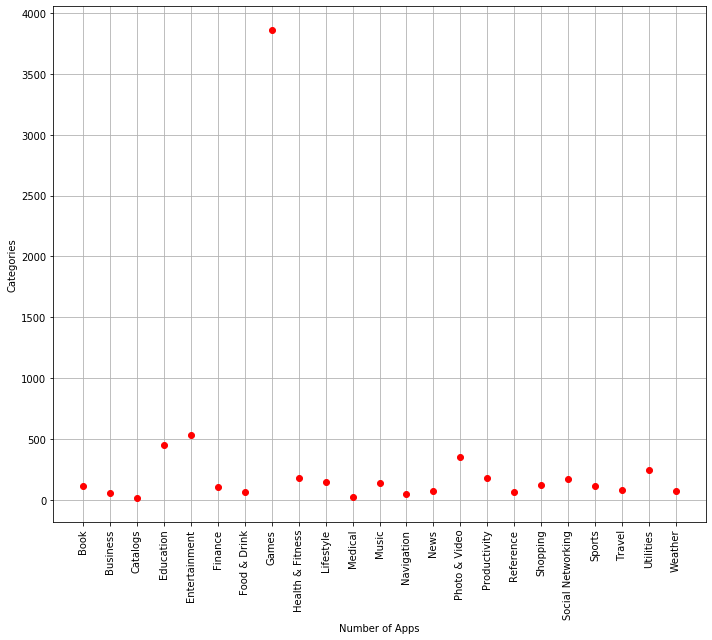

In [67]:
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

data = pds.read_csv("AppleStore.csv")
lst = data.groupby('prime_genre').size()

plt.figure(figsize=(10,9))
plt.plot(lst,'o',color='red')
plt.xticks(lst.index, rotation='vertical')
plt.xlabel('Number of Apps')
plt.ylabel('Categories')
plt.tight_layout()
plt.grid()
plt.show()        

El siguiente analisis a realizar será el valor de los precios, para observar al rededor de que precios se concentra la mayor cantidad de aplicaciones.

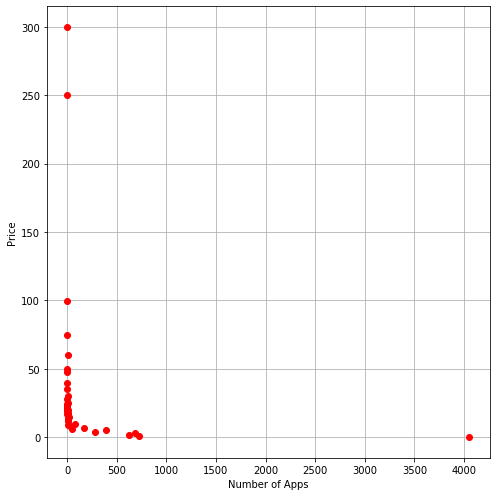

In [47]:
priceData = data['price']
size = priceData.size

price = []
cnt = []

for i in range(0,size):
    if priceData[i] not in price:
        price.append(priceData[i])
        cnt.append(1)
    else:
        idx = price.index(priceData[i])
        cnt[idx] = cnt[idx] + 1

plt.figure(figsize=(7,7))
plt.plot(cnt,price,'o',color='red')
plt.ylabel('Price')
plt.xlabel('Number of Apps')
plt.tight_layout()
plt.grid()
plt.show()


De la gráfica se observa que hay un par de precios bastante elevados con muy poca cantidad de aplicaciones que provocan la gráfica pierda mucha información. Si procede entonces a limitar el máximo del precio a 50 dolares.

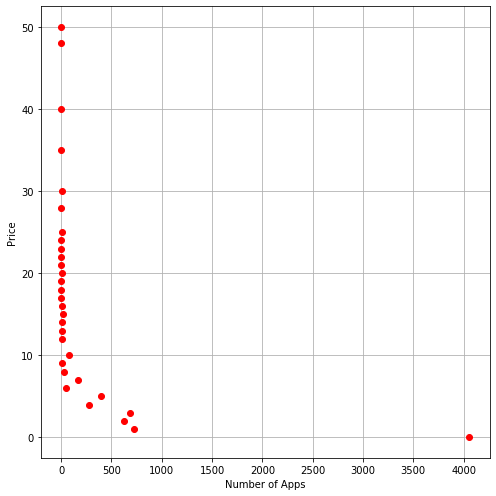

In [68]:
priceData = data['price']
size = priceData.size

price = []
cnt = []

for i in range(0,size):
    if priceData[i].astype(int) < 50:
        if priceData[i] not in price:
            price.append(priceData[i])
            cnt.append(1)
        else:
            idx = price.index(priceData[i])
            cnt[idx] = cnt[idx] + 1

plt.figure(figsize=(7,7))
plt.plot(cnt,price,'o',color='red')
plt.ylabel('Price')
plt.xlabel('Number of Apps')
plt.tight_layout()
plt.grid()
plt.show()